In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR, NuSVR
# from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
MODELS = [DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, SVR, NuSVR,
          LinearRegression, BayesianRidge, DecisionTreeRegressor, KNeighborsRegressor, XGBRegressor, XGBRFRegressor]

In [5]:
housing = pd.read_csv(r'./datasets/kc_house_data.csv').sample(5000)
quality = pd.read_csv(r'./datasets/winequality-red.csv')

In [6]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12860,3275730120,20140818T000000,446000.0,4,2.50,1530,8375,1.0,0,0,...,7,1020,510,1974,0,98034,47.7174,-122.236,1650,9794
15145,8712100020,20150127T000000,600000.0,2,1.00,1290,4636,1.0,0,0,...,7,1290,0,1924,0,98112,47.6393,-122.301,1940,4635
7129,4427100095,20140623T000000,360000.0,4,1.50,1720,6417,1.0,0,0,...,7,1720,0,1953,0,98125,47.7268,-122.311,1430,6240
7158,3622059180,20140703T000000,390000.0,4,2.00,1900,76877,1.0,0,0,...,8,1900,0,2004,0,98042,47.3491,-122.113,1740,34848
20384,3524039228,20140723T000000,394000.0,3,2.00,1160,3441,1.0,0,0,...,6,580,580,1930,0,98136,47.5314,-122.392,1160,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,2607720420,20150120T000000,445000.0,3,2.50,2250,9608,2.0,0,0,...,8,2250,0,1994,0,98045,47.4865,-121.802,2020,9834
1051,7625704510,20141022T000000,850000.0,4,3.25,3450,6500,2.0,0,0,...,8,2450,1000,1994,0,98136,47.5437,-122.388,1750,6500
20849,7137800310,20150225T000000,329950.0,4,2.50,2300,9690,2.0,0,0,...,8,2300,0,2006,0,98023,47.2793,-122.352,1200,9085
6242,7852110050,20140625T000000,574000.0,3,2.50,2380,6832,2.0,0,0,...,8,2380,0,2002,0,98065,47.5372,-121.876,2580,6832


In [7]:
quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 12860 to 21216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  lon

In [9]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
def metrics(tt, tp, vt, vp, model, time=None): return {
    "model": model,
    'time': time,
    "mse": (mean_squared_error(tt, tp),
            mean_squared_error(vt, vp)),
    'r2': (r2_score(tt, tp),
           r2_score(vt, vp))
}


def create_model(X, y, model_name, time_it: bool=False):
    model = Pipeline([
        ('scaler1', RobustScaler()),
        ('scaler2', MinMaxScaler()),
        ('model', model_name())
    ])
    if time_it == True:
        begin = time.time()
        model.fit(X, y)
        end = time.time()
        return (model, end - begin)
    return model.fit(X, y)


def get_metrics(X, y, model_name):
    Xt, Xv, yt, yv = train_test_split(X, y, train_size=.7)
    results = create_model(Xt, yt, model_name, time_it=True)
    model, time = results[0], results[1]
    return metrics(
        yt, model.predict(Xt), yv, 
        model.predict(Xv), model_name, time)
    
    
def get_results(X, y, models): return [get_metrics(
    X, y, i) for i in models]

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 12860 to 21216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  lon

In [12]:
quality_X =  quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode', 
            'lat', 'long', 'price'], axis=1)
housing_y = housing['price']

In [13]:
housing_y

12860    446000.0
15145    600000.0
7129     360000.0
7158     390000.0
20384    394000.0
           ...   
6595     445000.0
1051     850000.0
20849    329950.0
6242     574000.0
21216    369500.0
Name: price, Length: 5000, dtype: float64

In [14]:
quality_results = get_results(quality_X, quality_y, MODELS)
housing_results = get_results(housing_X, housing_y, MODELS)

c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
quality_results

[{'model': sklearn.tree._classes.DecisionTreeRegressor,
  'time': 0.038744211196899414,
  'mse': (0.0, 0.65625),
  'r2': (1.0, -0.03986135181975747)},
 {'model': sklearn.ensemble._forest.RandomForestRegressor,
  'time': 1.0730044841766357,
  'mse': (0.04840187667560321, 0.3419797916666667),
  'r2': (0.925234211792397, 0.4833674685760372)},
 {'model': sklearn.ensemble._weight_boosting.AdaBoostRegressor,
  'time': 0.31138157844543457,
  'mse': (0.3454317006104912, 0.38060252011881085),
  'r2': (0.4645266393796539, 0.429538179175157)},
 {'model': sklearn.ensemble._gb.GradientBoostingRegressor,
  'time': 0.6479752063751221,
  'mse': (0.22143555405996132, 0.40793756097252365),
  'r2': (0.658499709570484, 0.38132692174783145)},
 {'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor,
  'time': 1.9219870567321777,
  'mse': (0.04644026357378531, 0.4047143883127976),
  'r2': (0.9284728841301291, 0.38178361830612684)},
 {'model': sklearn.ensemble._bagg

In [17]:
housing_results

[{'model': sklearn.tree._classes.DecisionTreeRegressor,
  'time': 0.06400132179260254,
  'mse': (8172246.071428572, 69264259076.91667),
  'r2': (0.9999393725282549, 0.3917061513976212)},
 {'model': sklearn.ensemble._forest.RandomForestRegressor,
  'time': 3.2719974517822266,
  'mse': (5313225854.711665, 36985914148.73706),
  'r2': (0.9593523051403527, 0.7004383549580293)},
 {'model': sklearn.ensemble._weight_boosting.AdaBoostRegressor,
  'time': 0.34501123428344727,
  'mse': (53811215674.94536, 62161554945.51819),
  'r2': (0.6099725809009661, 0.4157565965822133)},
 {'model': sklearn.ensemble._gb.GradientBoostingRegressor,
  'time': 0.9950144290924072,
  'mse': (20451173992.769505, 38874993115.7942),
  'r2': (0.8459627497411786, 0.6724716633897025)},
 {'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor,
  'time': 1.4319918155670166,
  'mse': (13722916993.13321, 43922315343.39125),
  'r2': (0.8885510343268906, 0.6888895591477899)},
 {'model'

In [44]:
def plot_results(results: 'list[dict]'):
    y = [i['model'] for i in results]
    pos = np.arange(len(y))
    plt.barh(pos, [i['mse'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Metrics')
    plt.show()
    plt.barh(pos, [i['time'] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Metrics')
    plt.show()
    plt.barh(pos, [i['r2'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Metrics')
    plt.show()

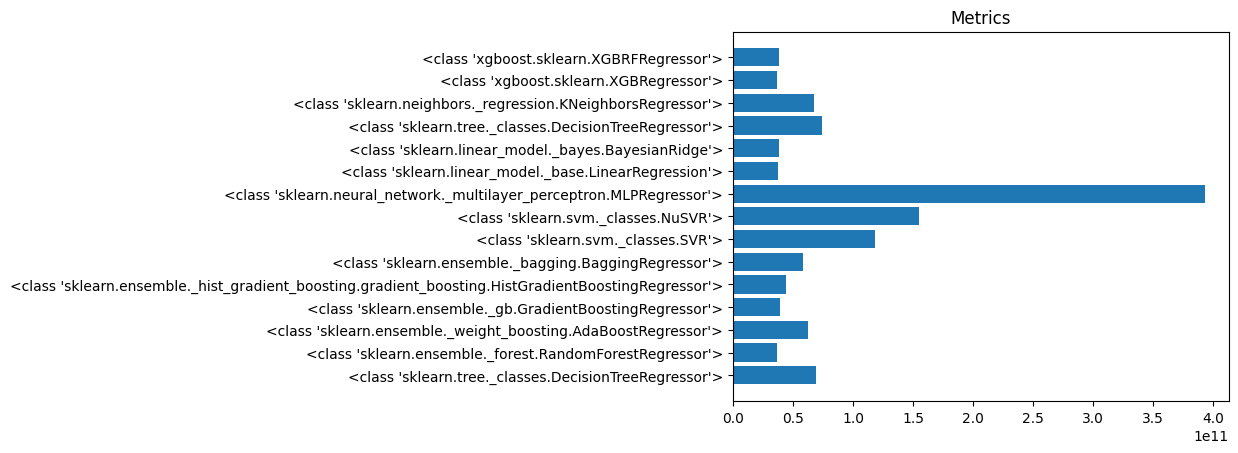

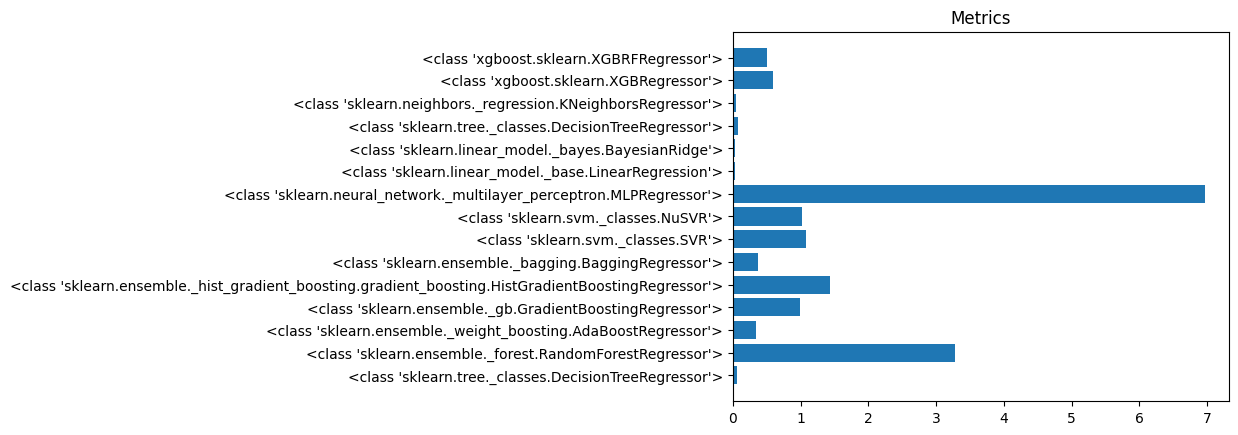

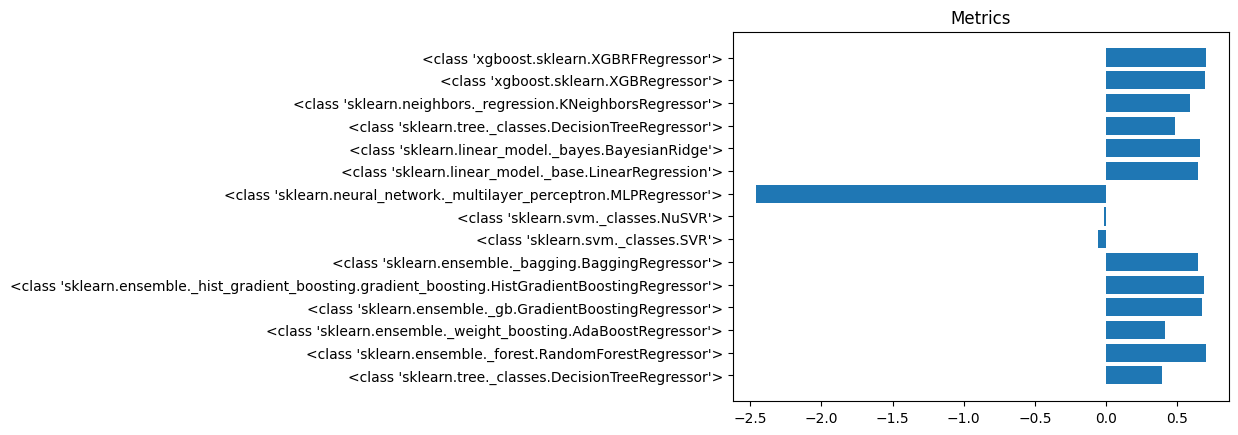

In [45]:
plot_results(housing_results)